<a href="https://colab.research.google.com/github/Neeraj6maths/Mobile-Price-Range-Prediction/blob/main/Copy_of_MOBILE_PRICE_RANGE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

In [6]:
import warnings
warnings.filterwarnings("ignore")

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

# **Attribute Information**

Data Description - 

**Battery_power** - Total energy a battery can store in one time measured in mAh

**Blue** - Has bluetooth or not

**Clock_speed** - speed at which microprocessor executes instructions

**Dual_sim** - Has dual sim support or not

**Fc** - Front Camera mega pixels

**Four_g** - Has 4G or not

**Int_memory** - Internal Memory in Gigabytes

**M_dep** - Mobile Depth in cm

**Mobile_wt** - Weight of mobile phone

**N_cores** - Number of cores of processor

**Pc** - Primary Camera mega pixels

**Px_height** - Pixel Resolution Height

**Px_width** - Pixel Resolution Width

**Ram** - Random Access Memory in Mega Bytes

**Sc_h** - Screen Height of mobile in cm

**Sc_w** - Screen Width of mobile in cm

**Talk_time** - longest time that a single battery charge will last when you are

**Three_g** - Has 3G or not

**Touch_screen** - Has touch screen or not

**Wifi** - Has wifi or not

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [9]:
# Reading dataset
df2 = pd.read_csv("/content/drive/MyDrive/AlmaBetter/capstone projects/Supervised ML - Classification/mobile price range/Copy of data_mobile_price_range.csv")
mobile_df = df2.copy()  # copying dataset

In [10]:
# Taking a look at data
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [12]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [13]:
mobile_df.describe(include = 'all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
print(f"No. of rows in dataset : {mobile_df.shape[0]}")
print(f"No. of columns in dataset : {mobile_df.shape[1]}")

No. of rows in dataset : 2000
No. of columns in dataset : 21


In [15]:
# checking null values
mobile_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No null data in dataset.

In [16]:
# Cheking for duplicate data.
mobile_df.duplicated().sum()

0

No duplicate rows.

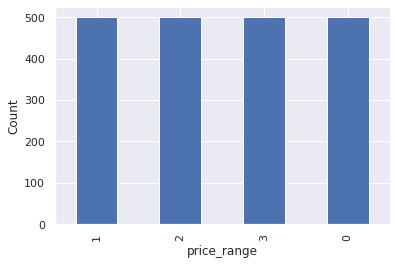

In [17]:
sns.set()
price_plot=mobile_df['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

Given dataset is balanced.

In [18]:
mobile_df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Data distribution

In [19]:
dep_var = 'price_range'
cat_feat = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
num_feat = list(set(mobile_df.columns) -  set(cat_feat) - {dep_var})

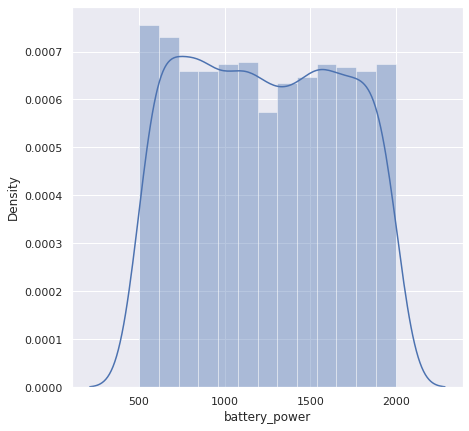

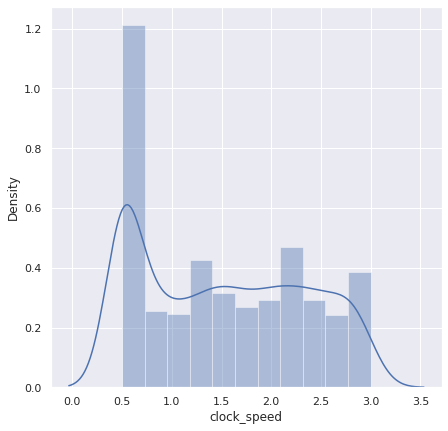

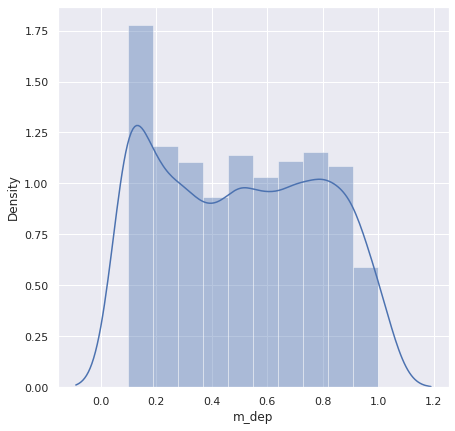

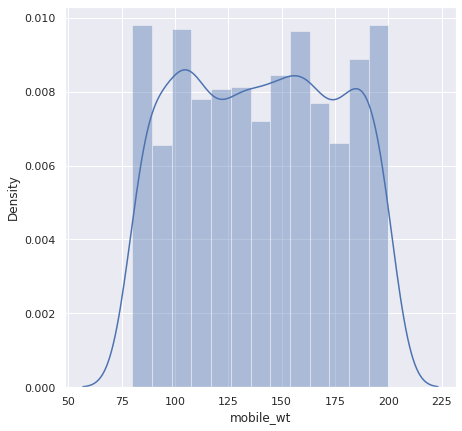

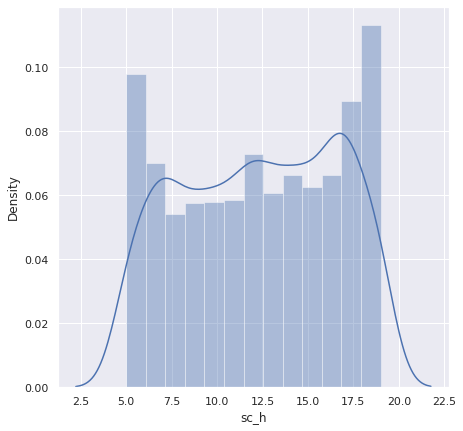

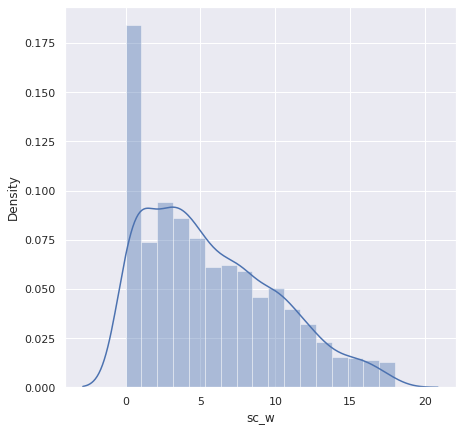

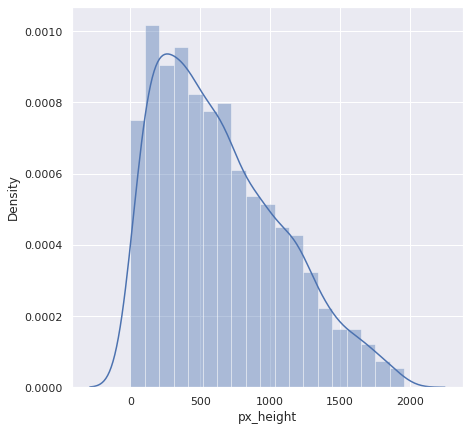

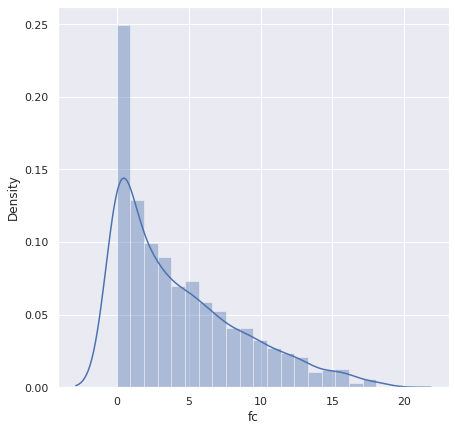

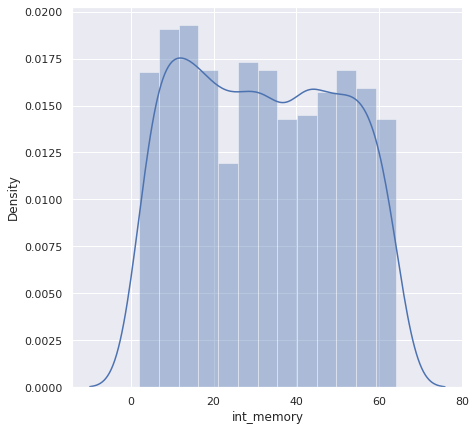

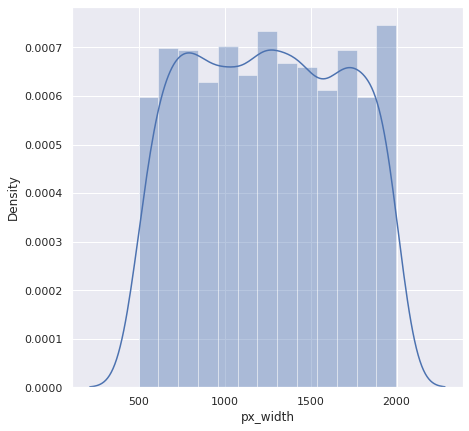

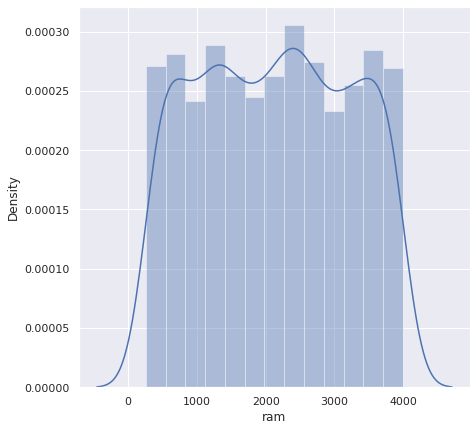

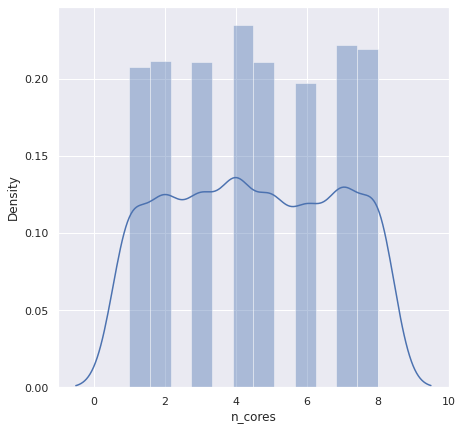

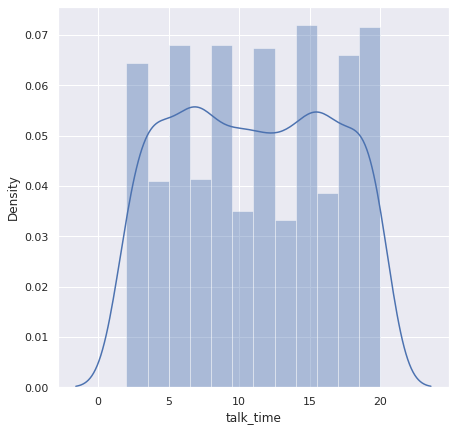

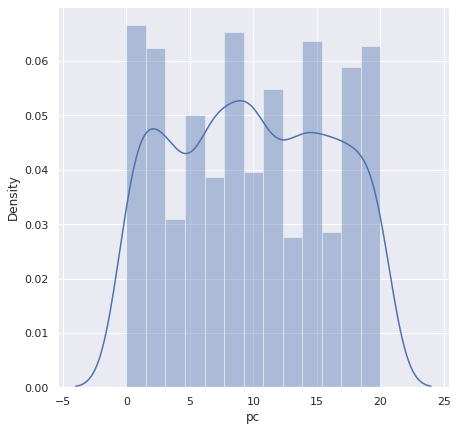

In [20]:
sns.set(rc={'figure.figsize':(7,7)})
for col in num_feat:
  
  sns.distplot(mobile_df[col])
  plt.show()

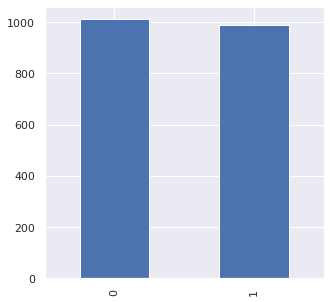

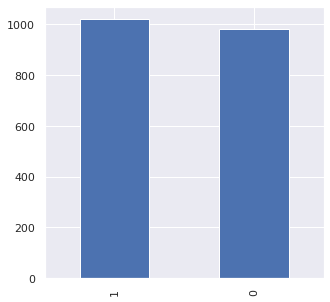

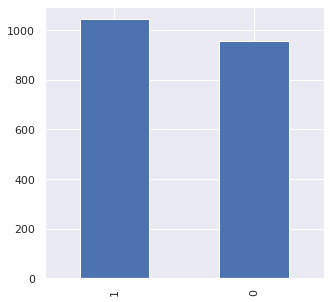

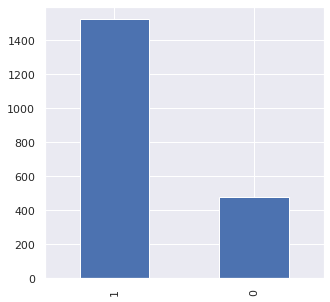

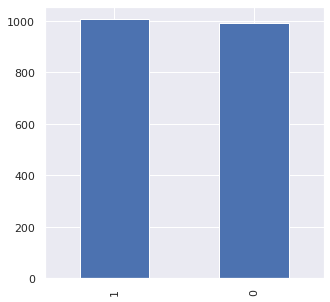

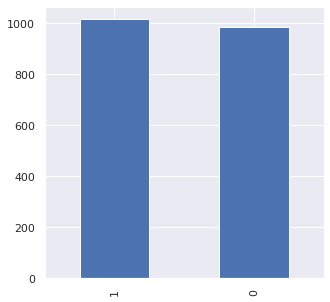

In [21]:
sns.set(rc={'figure.figsize':(5,5)})
for col in cat_feat:
  
  mobile_df[col].value_counts().plot(kind = 'bar')
  plt.show()

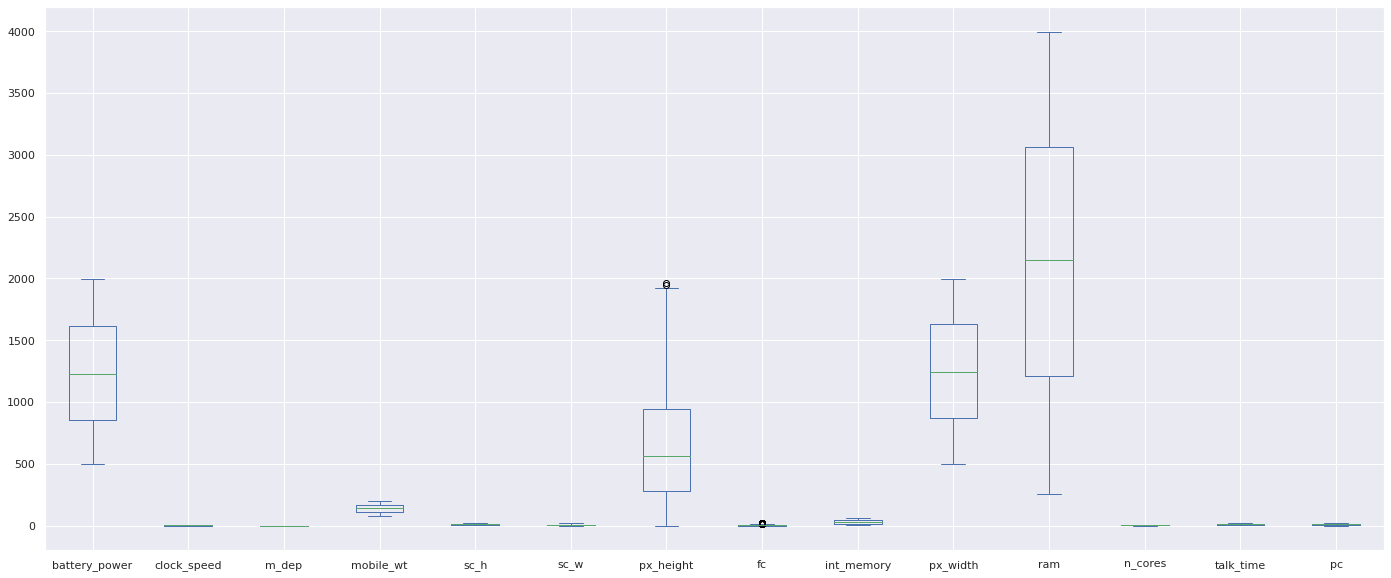

In [22]:
mobile_df[num_feat].plot(kind = 'box', figsize = (24,10))
plt.show()

No outliers are present.

EDA

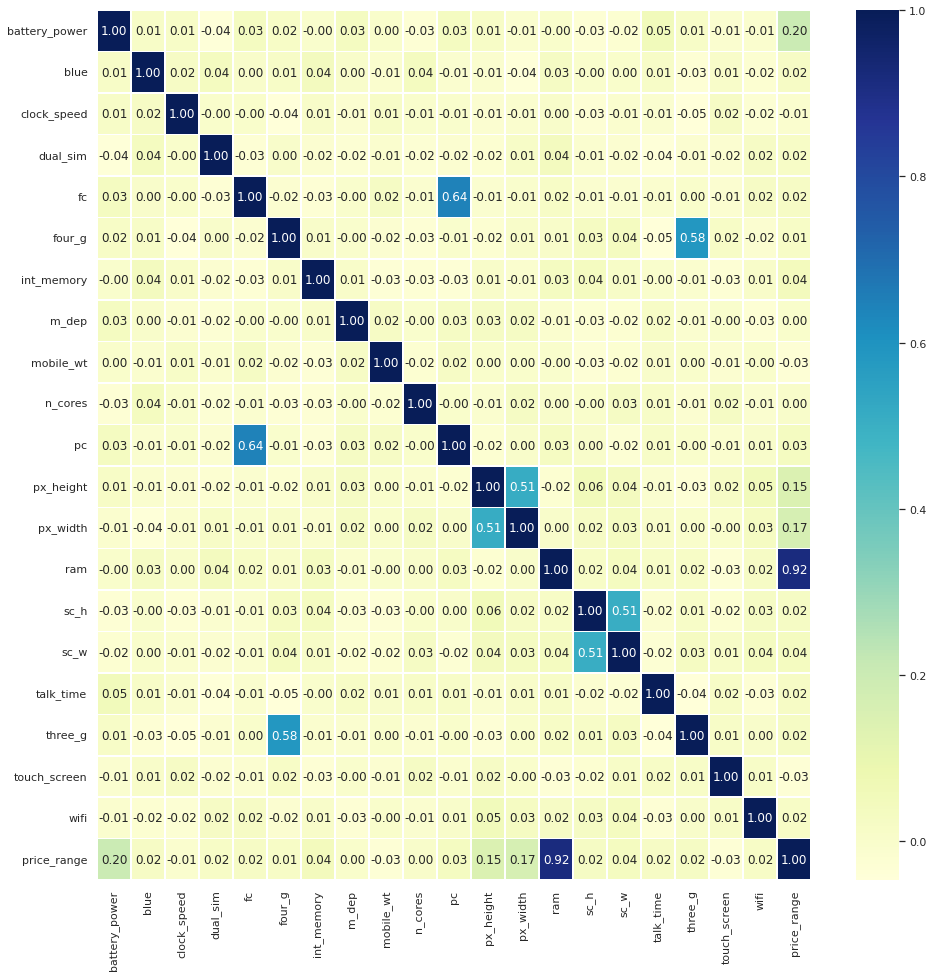

In [23]:
plt.figure(figsize = (16,16))
corr_df = mobile_df.corr()
sns.heatmap(data = corr_df, annot = True,fmt = '0.2f',cmap="YlGnBu",linewidths=.5)

In [24]:
y = mobile_df[dep_var].values

x = mobile_df[mobile_df.drop(dep_var, axis = 1).columns].values

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [26]:
x_train.shape

(1600, 20)

In [27]:
x_test.shape

(400, 20)

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
pred = dtc.predict(x_test)
confusion_matrix(  y_test,pred)

array([[ 87,   8,   0,   0],
       [  8,  69,  15,   0],
       [  0,  15,  71,  13],
       [  0,   0,  14, 100]])

In [32]:
confusion_matrix( pred,y_test)

array([[ 87,   8,   0,   0],
       [  8,  69,  15,   0],
       [  0,  15,  71,  14],
       [  0,   0,  13, 100]])

In [33]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        95
           1       0.75      0.75      0.75        92
           2       0.72      0.71      0.71       100
           3       0.88      0.88      0.88       113

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [34]:
def evaluating_model(model,x_train, x_test, y_train, y_test):
  '''This fucntion inputs the model and various datasets.
     It then predicts using the model and input datasets after that it evaluates the prediction
     using various metrics and returns the result of evaluation.'''
  y_train_pred = model.predict(x_train)                         
  y_train_pred_proba = model.predict_proba(x_train)[:,1]
  y_pred = model.predict(x_test)
  y_pred_proba = model.predict_proba(x_test)[:, 1]

  print('-------------- Train set evaluation ---------------')

  print(f"Train accuracy_score : {round(accuracy_score(y_train,y_train_pred),4)}")
  
  #print(f"Train roc_auc_score : {round(roc_auc_score(y_train,y_train_pred_proba,multi_class='ovr'),4)}")

  print(f"Train f1_score : {round(f1_score(y_train,y_train_pred,average='macro'),4)}")
  
  print(f"Train precision score : {round(precision_score(y_train,y_train_pred,average='macro'),4)}")

  print(f"Train recall score : {round(recall_score(y_train,y_train_pred,average='macro'),4)}")

  print(f"Train confusion matrix : \n{confusion_matrix(y_train,y_train_pred)}\n")

  print('-------------- Test set evaluation ---------------')

  print(f"Test accuracy_score : {round(accuracy_score(y_test,y_pred),4)}")
  
  #print(f"Test roc_auc_score : {round(roc_auc_score(y_test,y_pred_proba,multi_class='ovr'),4)}")

  print(f"Test f1_score : {round(f1_score(y_test,y_pred,average='macro'),4)}")
  
  print(f"Test precision score : {round(precision_score(y_test,y_pred,average='macro'),4)}")

  print(f"Test recall score : {round(recall_score(y_test,y_pred,average='macro'),4)}\n")

  print(f"Test confusion matrix : \n{confusion_matrix(y_test,y_pred)}\n")

In [35]:
def randomforest_fit(x_train, y_train):
  ''' Defining and training random forest model '''
  RF = RandomForestClassifier( random_state = 0)
  RF.fit(x_train,y_train)
  return RF

def gradientboosting_fit(x_train,y_train):
  ''' Defining and training gradient boosting model '''
  GB1 = GradientBoostingClassifier(random_state = 0)
  GB1.fit(x_train,y_train)
  return GB1

def supportvector_fit(x_train, y_train):
  ''' Defining and training SVM model '''
  svc1 = SVC(probability = True)
  svc1.fit(x_train,y_train)
  return svc1

def logisticregression_fit(x_train,y_train):
  ''' Defining and training logistic regression model '''
  logreg = LogisticRegression(multi_class='multinomial')
  logreg.fit(x_train, y_train)
  return logreg

def knn_fit(x_train,y_train):
  ''' Defining and training knn model '''
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)
  return knn

In [36]:
# Defining random forest model
rf1 = randomforest_fit(x_train, y_train)

# Defining gradient boosting model
gb1 = gradientboosting_fit(x_train, y_train)

# Defining SVM model
svm1 = supportvector_fit(x_train,y_train)

# Defining logistic regression model
lr1 = logisticregression_fit(x_train,y_train)

# Defining knn model
knn1 = knn_fit(x_train,y_train)

In [37]:
evaluating_model(rf1,x_train, x_test, y_train, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 1.0
Train f1_score : 1.0
Train precision score : 1.0
Train recall score : 1.0
Train confusion matrix : 
[[405   0   0   0]
 [  0 408   0   0]
 [  0   0 401   0]
 [  0   0   0 386]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.8575
Test f1_score : 0.8544
Test precision score : 0.8536
Test recall score : 0.8555

Test confusion matrix : 
[[ 93   2   0   0]
 [  6  73  13   0]
 [  0  16  73  10]
 [  0   0  10 104]]



In [38]:
evaluating_model(gb1,x_train, x_test, y_train, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.9981
Train f1_score : 0.9981
Train precision score : 0.9982
Train recall score : 0.9981
Train confusion matrix : 
[[404   1   0   0]
 [  0 407   1   0]
 [  0   1 400   0]
 [  0   0   0 386]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.9125
Test f1_score : 0.9116
Test precision score : 0.9124
Test recall score : 0.9112

Test confusion matrix : 
[[ 90   5   0   0]
 [  1  82   9   0]
 [  0   8  85   6]
 [  0   0   6 108]]



In [39]:
evaluating_model(svm1,x_train, x_test, y_train, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.9825
Train f1_score : 0.9826
Train precision score : 0.9828
Train recall score : 0.9824
Train confusion matrix : 
[[402   3   0   0]
 [  2 400   6   0]
 [  0   6 393   2]
 [  0   0   9 377]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.89
Test f1_score : 0.8896
Test precision score : 0.8903
Test recall score : 0.8903

Test confusion matrix : 
[[ 89   6   0   0]
 [  4  82   6   0]
 [  0  12  83   4]
 [  0   0  12 102]]



In [40]:
evaluating_model(lr1,x_train, x_test, y_train, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.9781
Train f1_score : 0.9783
Train precision score : 0.9783
Train recall score : 0.9782
Train confusion matrix : 
[[401   4   0   0]
 [  9 395   4   0]
 [  0  10 387   4]
 [  0   0   4 382]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.955
Test f1_score : 0.9539
Test precision score : 0.9548
Test recall score : 0.9533

Test confusion matrix : 
[[ 93   2   0   0]
 [  2  85   5   0]
 [  0   3  91   5]
 [  0   0   1 113]]



In [41]:
evaluating_model(knn1,x_train, x_test, y_train, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.695
Train f1_score : 0.6972
Train precision score : 0.7093
Train recall score : 0.6948
Train confusion matrix : 
[[344  51  10   0]
 [ 95 261  46   6]
 [ 25 108 243  25]
 [  1  28  93 264]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.515
Test f1_score : 0.5158
Test precision score : 0.5305
Test recall score : 0.5171

Test confusion matrix : 
[[69 21  4  1]
 [30 44 12  6]
 [ 9 41 36 13]
 [ 0 10 47 57]]



In [174]:
def randomforest_fit_hpt(x_train, y_train):
  ''' defining random forest model with hyperparameter tuning''' 
  param_dict = {'n_estimators' : [1100,1200,1300,1400,1500],
                'criterion' : ['gini'],
                'max_depth' : list(np.linspace(2, 20,  dtype = int)),
                'max_features' : ['sqrt', 'log2', 0.3,0.4,0.5],
                # 'min_samples_split' : list(np.linspace(4, 30, dtype = int)) ,
                'max_samples' : list(np.linspace(0.4,1,7)),
                'min_samples_leaf' : list(np.linspace(10, 40, 15, dtype = int))}
                #'max_leaf_nodes' : list(np.linspace(1, 100, 25, dtype = int))}
  RF = RandomForestClassifier( random_state = 0)
  model = RandomizedSearchCV(estimator = RF, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)
  model.fit(x_train,y_train)
  return model

def svm_fit_hpt(x_train,y_train):
  ''' defining svm with hyperparameter tuning'''
  param_dict = {'C' : list(np.linspace(0.01,10,100)),
              'gamma' : ['scale', 'auto'],
              'kernel' : [ 'rbf', 'sigmoid']}
  svm1 = SVC(probability=True,random_state = 0)
  model = RandomizedSearchCV(estimator = svm1, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 6, random_state= 10)

  model.fit(x_train, y_train)
  return model

def knn_fit_hpt(x_train,y_train):
  ''' defining knn with hyperparameter tuning'''
  param_dict = {'n_neighbors' : [19,21],
              'weights' : [ 'distance'],
              'algorithm' : [  'kd_tree', 'brute'],
              'metric': ['minkowski']}
  knn1 = KNeighborsClassifier()
  model = RandomizedSearchCV(estimator = knn1, param_distributions = param_dict, scoring = 'f1' ,
                               cv = 5, random_state= 10)

  model.fit(x_train, y_train)
  return model

In [175]:
#rf2 = randomforest_fit_hpt(x_train,y_train)

#svc2 = svm_fit_hpt(x_train,y_train)

knn2 = knn_fit_hpt(x_train,y_train)

In [105]:
rf2.best_params_

{'criterion': 'gini',
 'max_depth': 13,
 'max_features': 0.4,
 'max_samples': 0.7,
 'min_samples_leaf': 22,
 'n_estimators': 1500}

In [143]:
svc2.best_params_

{'C': 0.885858585858586, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [176]:
knn2.best_params_

{'algorithm': 'kd_tree',
 'metric': 'minkowski',
 'n_neighbors': 19,
 'weights': 'distance'}

In [106]:
# Evaluating random forest model
evaluating_model(rf2,x_train, x_test, y_train, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8906
Train f1_score : 0.8907
Train precision score : 0.8907
Train recall score : 0.8911
Train confusion matrix : 
[[389  16   0   0]
 [ 35 343  30   0]
 [  0  46 333  22]
 [  0   0  26 360]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.8425
Test f1_score : 0.8362
Test precision score : 0.8373
Test recall score : 0.8389

Test confusion matrix : 
[[ 92   3   0   0]
 [  6  73  13   0]
 [  0  19  64  16]
 [  0   0   6 108]]



In [95]:
# Evaluating SVC model
evaluating_model(svc2,x_train, x_test, y_train, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 0.8781
Train f1_score : 0.8788
Train precision score : 0.8795
Train recall score : 0.8784
Train confusion matrix : 
[[369  36   0   0]
 [ 33 345  30   0]
 [  0  31 343  27]
 [  0   0  38 348]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.9075
Test f1_score : 0.9052
Test precision score : 0.9056
Test recall score : 0.9052

Test confusion matrix : 
[[ 91   4   0   0]
 [  3  80   9   0]
 [  0  10  82   7]
 [  0   0   4 110]]



In [177]:
# Evaluating knn model
evaluating_model(knn2,x_train, x_test, y_train, y_test)

-------------- Train set evaluation ---------------
Train accuracy_score : 1.0
Train f1_score : 1.0
Train precision score : 1.0
Train recall score : 1.0
Train confusion matrix : 
[[405   0   0   0]
 [  0 408   0   0]
 [  0   0 401   0]
 [  0   0   0 386]]

-------------- Test set evaluation ---------------
Test accuracy_score : 0.64
Test f1_score : 0.6447
Test precision score : 0.6637
Test recall score : 0.639

Test confusion matrix : 
[[68 24  3  0]
 [16 53 22  1]
 [ 3 27 60  9]
 [ 0  4 35 75]]

